In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9451949542268088 at temperature -0.99
Average similarity between family and home is 0.9391416540241181 at temperature -1
Average similarity between students and their classroom is 0.9202038510113989 at temperature -1
Average similarity between workers is 0.9255654175642791 at temperature -1
Average friend similarity for adults: 0.9683031489741307 for kids: 0.9706896649164836
run with seed 9675:
avg restaurant similarity 0.973531171421084
avg restaurant similarity 0.9731714060729068
avg restaurant similarity 0.975266314349926
avg restaurant similarity 0.9725846474313464
avg restaurant similarity 0.9739208739047319
avg restaurant similarity 0.9730889584804635
avg restaurant similarity 0.9747719734129321
avg restaurant similarity 0.9740185253760321
avg restaurant similarity 0.9765066214658181
avg restaurant similarity 0.9743450932723825
avg restaurant similarity 0.9747097

avg restaurant similarity 0.9756351560643916
avg restaurant similarity 0.9731230459714321
avg restaurant similarity 0.9747839000983826
avg restaurant similarity 0.9755917704673783
avg restaurant similarity 0.9743918318965923
avg restaurant similarity 0.9746472916246
avg restaurant similarity 0.9757595232339407
avg restaurant similarity 0.9745533868842635
avg restaurant similarity 0.9749797008332314
avg restaurant similarity 0.9731685101033565
avg restaurant similarity 0.9742682534900919
avg restaurant similarity 0.9749876909657422
avg restaurant similarity 0.9764172658277961
avg restaurant similarity 0.9732251008547111
avg restaurant similarity 0.9746732143247998
avg restaurant similarity 0.9738288556253558
avg restaurant similarity 0.9744068617438653
avg restaurant similarity 0.9757856645480084
avg restaurant similarity 0.9744343368890718
avg restaurant similarity 0.9727105897391479
avg restaurant similarity 0.9739732355922769
avg restaurant similarity 0.974471243521205
avg restaurant

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.45367222222222225]
min:
0.45367222222222225
max:
0.45367222222222225
std:
0.0
mean:
0.45367222222222225
median:
0.45367222222222225
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.041825]
min:
0.041825
max:
0.041825
std:
0.0
mean:
0.041825
median:
0.041825
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.4746555555555555]
min:
0.4746555555555555
max:
0.4746555555555555
std:
0.0
mean:
0.4746555555555555
median:
0.4746555555555555
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.008047222222222223]
min:
0.008047222222222223
max:
0.008047222222222223
std:
0.0
mean:
0.008047222222222223
median:
0.008047222222222223
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [0.0024805555555555553]
min:
0.00248055555

(<function dict.items>, <function dict.items>, <function dict.items>)

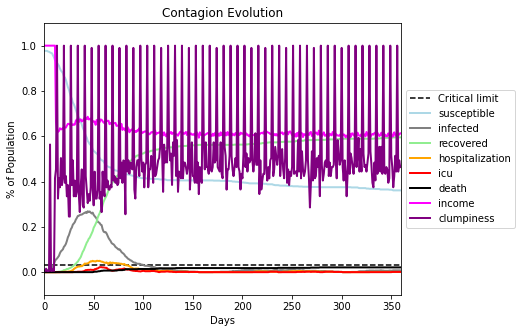

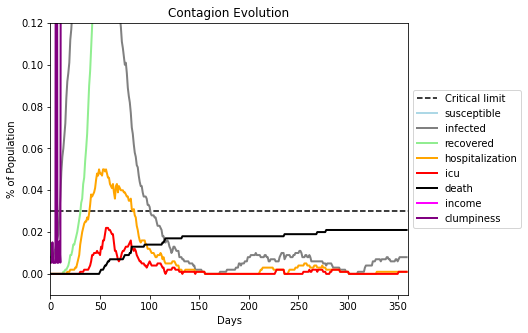

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
params.params['num_communities'] = 1
seeds = [9675]
setLevel(logging.DEBUG)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]


KeyError: (8.458959647868001, -7.602114449250586, 6.422775483323582, -6.924977433487697, -0.5201887353266887, 3.984643270634468, 4.51003756645948, 5.368381470829185, -3.4525648729049054, 8.116325597135395)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 3, home_grid_width = 4, listeners = listeners)